In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({
    'A': [10, 11, 8, 3,   2, 1],
    'B': [ 6,  4, 5, 3, 2.8, 1]
})
df

,A,B
0,10,6.0
1,11,4.0
2,8,5.0
3,3,3.0
4,2,2.8
5,1,1.0


Text(0, 0.5, 'Caractéristique B')

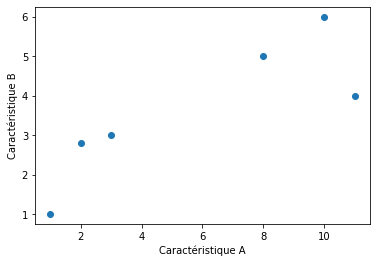

In [4]:
plt.scatter(df.A, df.B)
plt.xlabel('Caractéristique A')
plt.ylabel('Caractéristique B')

Text(0, 0.5, 'Caractéristique B')

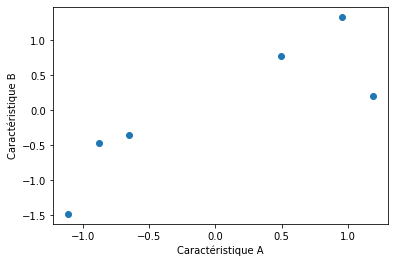

In [5]:
df_norm = (df-df.mean())/df.std()

plt.scatter(df_norm.A, df_norm.B)
plt.xlabel('Caractéristique A')
plt.ylabel('Caractéristique B')

## Using sklearn

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
res = pca.fit_transform(df_norm)
res

array([[-1.62293061, -0.26989804],
       [-0.98550776,  0.69225262],
       [-0.89830941, -0.19473248],
       [ 0.71329688, -0.20676527],
       [ 0.95563946, -0.2891505 ],
       [ 1.83781145,  0.26829367]])

In [8]:
# Singular values
pca.singular_values_.round(2)

array([3.04, 0.89])

In [9]:
# Eigenvalues
pca.explained_variance_.round(2)

array([1.84, 0.16])

In [10]:
# Eigenvalues/eigenvalues.sum()
pca.explained_variance_ratio_.round(2)

array([0.92, 0.08])

In [11]:
# Eigenvectors
pca.components_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

<BarContainer object of 2 artists>

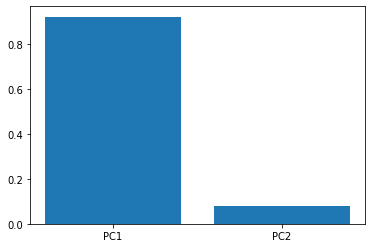

In [12]:
plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_)

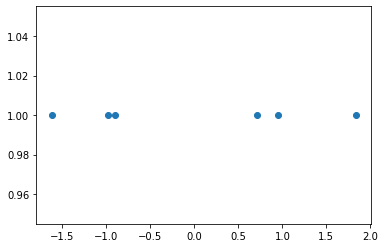

In [13]:
k = 1
df_reduced = np.dot(pca.components_[:k], df_norm.T)
plt.scatter(df_reduced[0], np.ones_like(df_reduced[0]))

## From scratch with eigenvalues

### Create covariance matrix

Here, we're applying Bessel's correction (dividing by n-1 instead of n) because our dataset is a sample.

In [14]:
cov = np.cov(df_norm.T)
cov

array([[1.        , 0.84233585],
       [0.84233585, 1.        ]])

In [15]:
(df_norm.T.dot(df_norm))/(len(df_norm)-1)

,A,B
A,1.000000,0.842336
B,0.842336,1.000000


### Compute eigenvalues & eigenvectors

In [16]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

# Here the column v[:,i] is the eigenvector
# corresponding to the eigenvalue w[i]
# Make it the opposite: v[i, :]
eigenvectors = eigenvectors.T

print("Eigenvalues (explained variance):\n", eigenvalues, "\n")
print("Eigenvectors (components):\n", eigenvectors)

Eigenvalues (explained variance):
 [0.15766415 1.84233585] 

Eigenvectors (components):
 [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


In [17]:
print("Explained variance ratio:\n", eigenvalues/eigenvalues.sum())

Explained variance ratio:
 [0.07883208 0.92116792]


### Sort eigenvectors by DESC eigenvalues

In [18]:
rsort_eigenvalues_idx = eigenvalues.argsort()[::-1]
rsort_eigenvalues_idx

array([1, 0])

In [19]:
eigenvalues[rsort_eigenvalues_idx]/eigenvalues.sum()

array([0.92116792, 0.07883208])

In [20]:
rsort_eigenvectors = eigenvectors[rsort_eigenvalues_idx]
rsort_eigenvectors

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

PC1 is a principal component that captures 0.92% of the data variance, using a combination of a and b (-0.71⋅a - 0.71⋅b). That means that a 1-D graph, using just PC1 would be a good approximation of the 2-D graph since it would account for 92% of the variation in the data. This can be used to identify clusters of data.

### Get k features

In [21]:
k = 1
df_reduced = np.dot(rsort_eigenvectors[:k], df_norm.T)
df_reduced

array([[-1.62293061, -0.98550776, -0.89830941,  0.71329688,  0.95563946,
         1.83781145]])

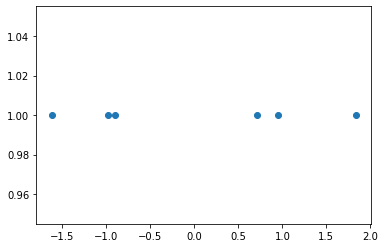

In [22]:
plt.scatter(df_reduced[0], np.ones_like(df_reduced[0]))

## From scratch using Singular values

In [23]:
U, s, V = np.linalg.svd(df_norm, full_matrices=False)

In [24]:
# Left singular vectors
U

array([[-0.53472507,  0.30398227],
       [-0.32470625, -0.77967413],
       [-0.29597603,  0.21932438],
       [ 0.23501789,  0.23287674],
       [ 0.31486521,  0.32566604],
       [ 0.60552426, -0.30217528]])

In [25]:
# Singular values
s.round(2)

array([3.04, 0.89])

In [26]:
# Right singular vectors = eigenvectors
V

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [27]:
# Eigenvalues
n_sample = len(df_norm)

(s**2/(n_sample-1)).round(2)

array([1.84, 0.16])

In [28]:
# Transformed data
k = 2
U[:, :k]*s[:k]

array([[-1.62293061,  0.26989804],
       [-0.98550776, -0.69225262],
       [-0.89830941,  0.19473248],
       [ 0.71329688,  0.20676527],
       [ 0.95563946,  0.2891505 ],
       [ 1.83781145, -0.26829367]])